# Example use cases

In [1]:
from encodings_hnns.encodings import HypergraphEncodings
from encodings_hnns.laplacians import Laplacians
import numpy as np
from brec_analysis.utils_for_brec import (

    nx_to_pyg,
)
import networkx as nx
from brec_analysis.plotting_graphs_and_hgraphs_for_brec import plot_hypergraph_pair
from encodings_hnns.liftings_and_expansions import lift_to_hypergraph

['/Users/pellegrinraphael/anaconda3/envs/clean_repo/lib/python311.zip', '/Users/pellegrinraphael/anaconda3/envs/clean_repo/lib/python3.11', '/Users/pellegrinraphael/anaconda3/envs/clean_repo/lib/python3.11/lib-dynload', '', '/Users/pellegrinraphael/anaconda3/envs/clean_repo/lib/python3.11/site-packages', '/Users/pellegrinraphael/Desktop/Repos_GNN/Hypergraph_Encodings/src']



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/pellegrinraphael/anaconda3/envs/clean_repo/lib/python3.11/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/Users/pellegrinraphael/anaconda3/envs/clean_repo/lib/python3.11/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/Users/pellegrinraphael/anaconda3/envs/clean_repo/lib/python3.11/site-packages/ipykern

## A - Encoding interface

In [2]:
hg: dict[str, dict | int] = {
    "hypergraph": {
        "yellow": [0, 1, 2, 3],
        "red": [1, 2],
        "green": [2, 4, 5],
        "blue": [3, 4],
    },
    "features": np.array([[1], [1], [1], [1], [1], [1]]),
    "labels": {},
    "n": 6,
}
# Instantiates the Hypergraph Curvature Profile class
hgcurvaturprofile = HypergraphEncodings()
hg = hgcurvaturprofile.add_randowm_walks_encodings(hg, verbose=False)
# k is 20 so the features are shape n by 21
assert isinstance(hg["features"], np.ndarray)
assert hg["features"].shape[0] == hg["n"]
assert hg["features"].shape[1] == 21, f"The shape is {hg['features'].shape[1]}"

print(hg)

{'hypergraph': {'yellow': [0, 1, 2, 3], 'red': [1, 2], 'green': [2, 4, 5], 'blue': [3, 4]}, 'features': array([[1.        , 0.        , 0.14814815, 0.08024691, 0.10048011,
        0.08681984, 0.09403895, 0.08909179, 0.09215521, 0.09012237,
        0.09142979, 0.09057234, 0.09112992, 0.09076514, 0.09100335,
        0.09084744, 0.09094948, 0.09088263, 0.09092645, 0.0908977 ,
        0.09091657],
       [1.        , 0.        , 0.37962963, 0.09259259, 0.24879973,
        0.14366141, 0.20723705, 0.16623099, 0.19185113, 0.17551149,
        0.18584563, 0.17926119, 0.18345126, 0.18077571, 0.18248561,
        0.18139043, 0.18209288, 0.18164153, 0.18193197, 0.18174478,
        0.18186561],
       [1.        , 0.        , 0.47685185, 0.1558642 , 0.34859396,
        0.22638746, 0.3020623 , 0.25446769, 0.28423023, 0.26550903,
        0.27727908, 0.2698567 , 0.27454259, 0.2715778 , 0.27345666,
        0.27226368, 0.27302248, 0.27253896, 0.27284761, 0.27265024,
        0.27277666],
       [1.       

In [3]:
hg = hgcurvaturprofile.add_degree_encodings(hg, verbose=True)
assert hg["features"].shape[0] == hg["n"]
assert hg["features"].shape[1] == 27, f"The shape is {hg['features'].shape[1]}"

hg = hgcurvaturprofile.add_laplacian_encodings(hg, verbose=True)
assert hg["features"].shape[0] == hg["n"]
assert hg["features"].shape[1] == 33, f"The shape is {hg['features'].shape[1]}"

The hypergraph features for node 0, are 
 [1.         0.         0.14814815 0.08024691 0.10048011 0.08681984
 0.09403895 0.08909179 0.09215521 0.09012237 0.09142979 0.09057234
 0.09112992 0.09076514 0.09100335 0.09084744 0.09094948 0.09088263
 0.09092645 0.0908977  0.09091657]
We add the degree encoding:
 [[1.         2.         3.         2.         2.33333333 0.47140452]]
The stacked features are 
 [[1.         0.         0.14814815 0.08024691 0.10048011 0.08681984
  0.09403895 0.08909179 0.09215521 0.09012237 0.09142979 0.09057234
  0.09112992 0.09076514 0.09100335 0.09084744 0.09094948 0.09088263
  0.09092645 0.0908977  0.09091657 1.         2.         3.
  2.         2.33333333 0.47140452]]
The hypergraph features for node 1, are 
 [1.         0.         0.37962963 0.09259259 0.24879973 0.14366141
 0.20723705 0.16623099 0.19185113 0.17551149 0.18584563 0.17926119
 0.18345126 0.18077571 0.18248561 0.18139043 0.18209288 0.18164153
 0.18193197 0.18174478 0.18186561]
We add the degree

### A-1: Lower level: Laplacian 

In [4]:
hg: dict[str, dict | int] = {
    "hypergraph": {
        "yellow": [1, 2, 3],
        "red": [2, 3],
        "green": [3, 5, 6],
        "blue": [4, 5],
    },
    "features": {},
    "labels": {},
    "n": 6,
}
data = hg

# Instantiates the Laplacians class
laplacian = Laplacians(data)
laplacian.compute_node_neighbors()
print(f"node_neighbors: \n {laplacian.node_neighbors}")
laplacian.compute_node_degrees()
print(f"node_degrees: \n {laplacian.node_degrees}")
laplacian.compute_random_walk_laplacian(rw_type="WE")
laplacian.compute_normalized_laplacian()
laplacian.compute_random_walk_laplacian()
print(f"rw_laplacian: \n {laplacian.rw_laplacian}")

node_neighbors: 
 OrderedDict([(1, {2, 3}), (2, {1, 3}), (3, {1, 2, 5, 6}), (4, {5}), (5, {3, 4, 6}), (6, {3, 5})])
node_degrees: 
 OrderedDict([(1, 1), (2, 2), (3, 3), (4, 1), (5, 2), (6, 1)])
The nodes are [1, 2, 3, 4, 5, 6]
The nodes are [1, 2, 3, 4, 5, 6]
rw_laplacian: 
 [[ 1.         -0.5        -0.5         0.          0.          0.        ]
 [-0.5         1.         -0.5         0.          0.          0.        ]
 [-0.25       -0.25        1.          0.         -0.25       -0.25      ]
 [ 0.          0.          0.          1.         -1.          0.        ]
 [ 0.          0.         -0.33333333 -0.33333333  1.         -0.33333333]
 [ 0.          0.         -0.5         0.         -0.5         1.        ]]


## B: Brec


Here we provide an example of graph lifting to hypergraphs using Rook and Shrikhande graphs. The 
plots are realized using the HyperNetX library.

Analyzing Rook vs Shrikhande


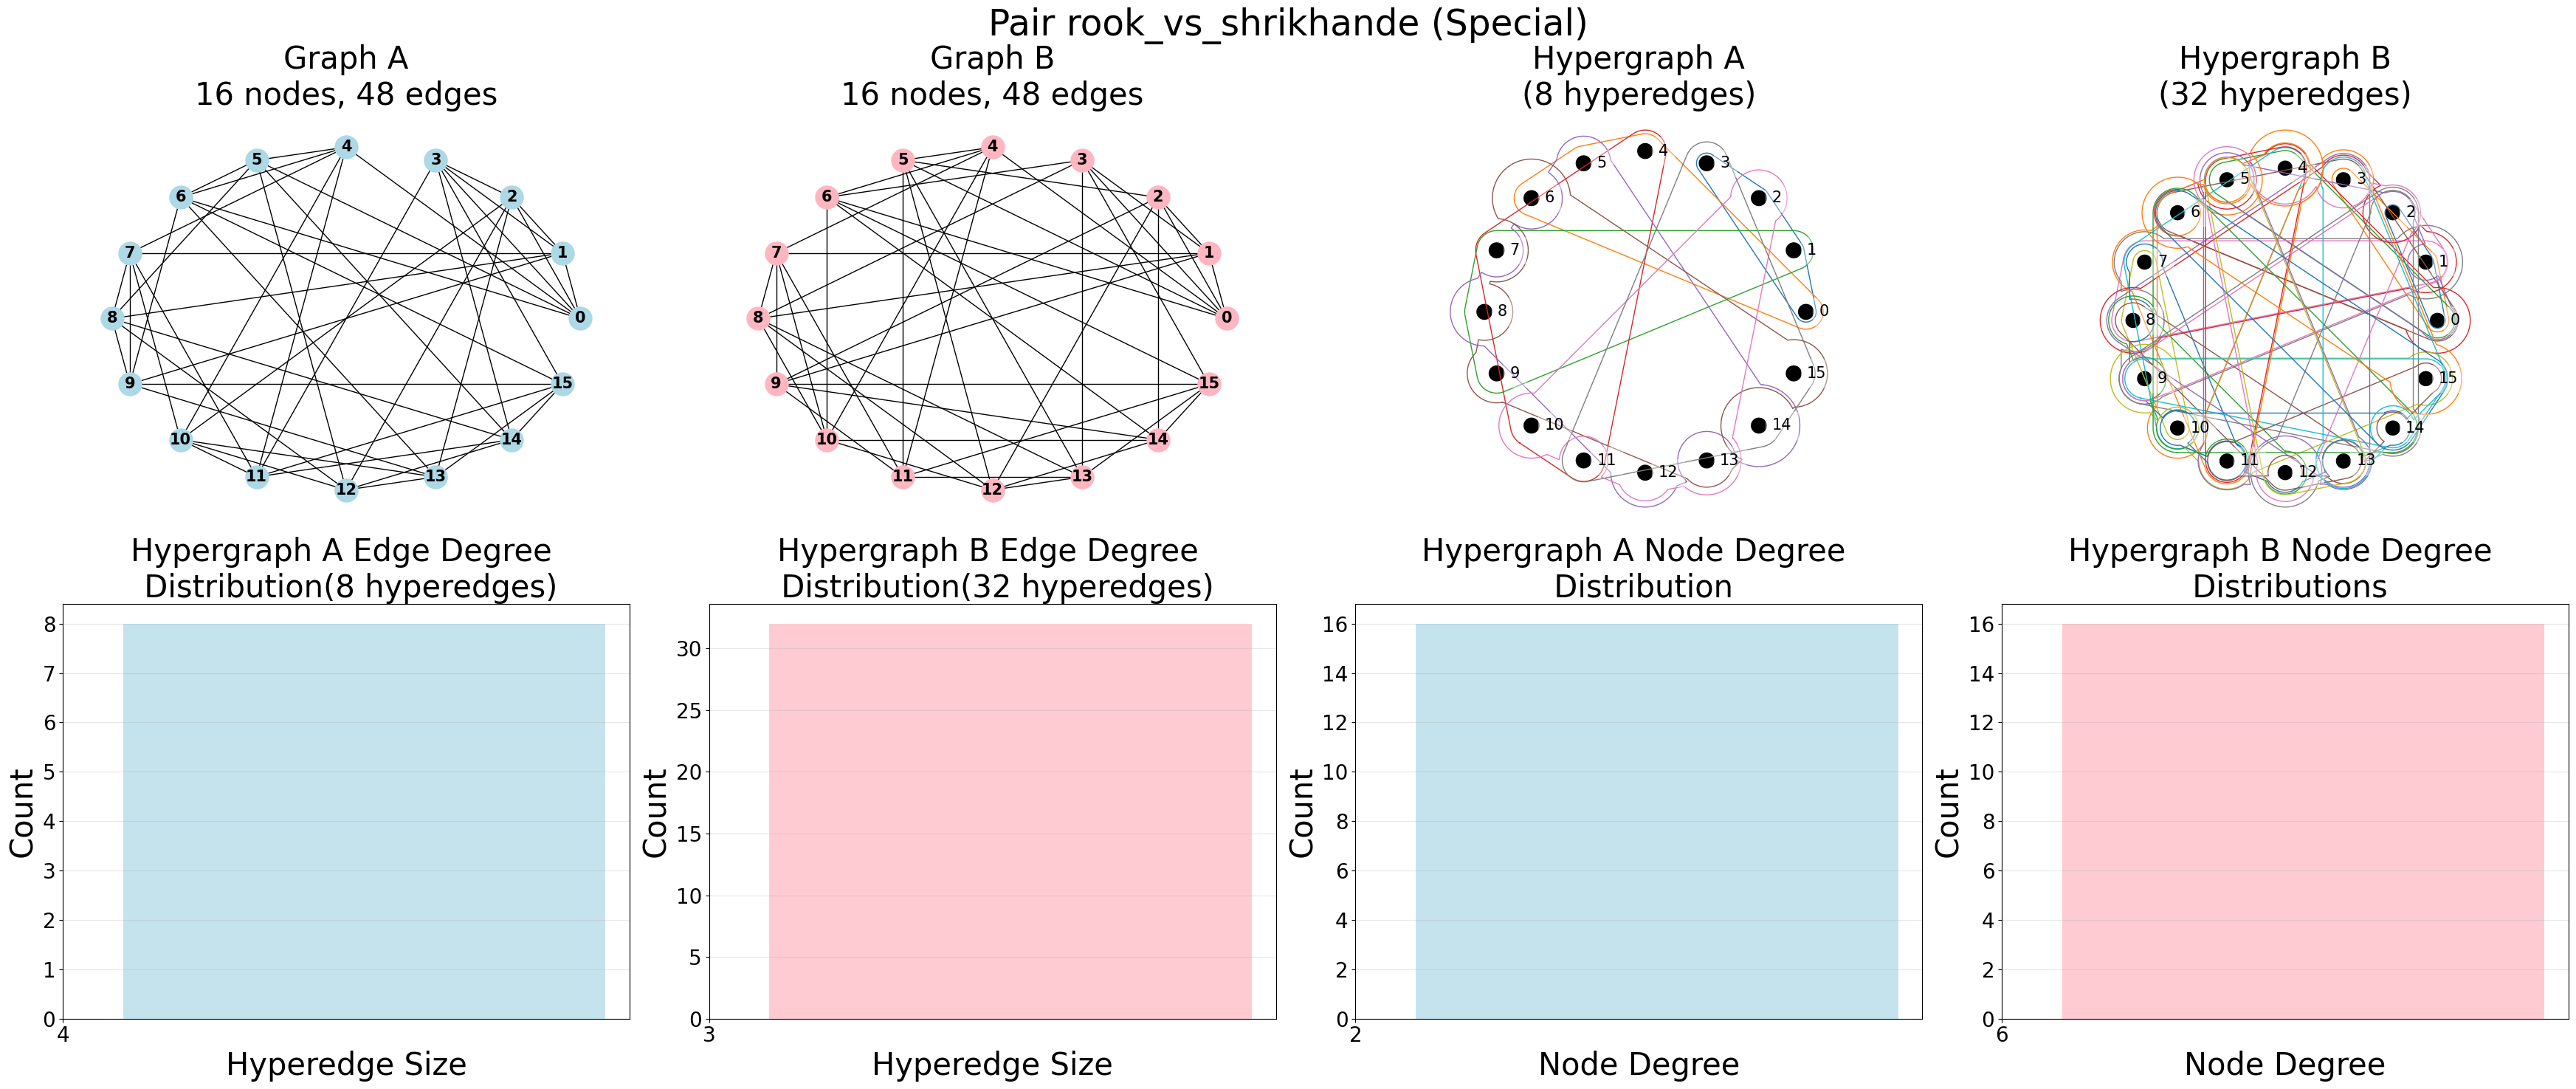

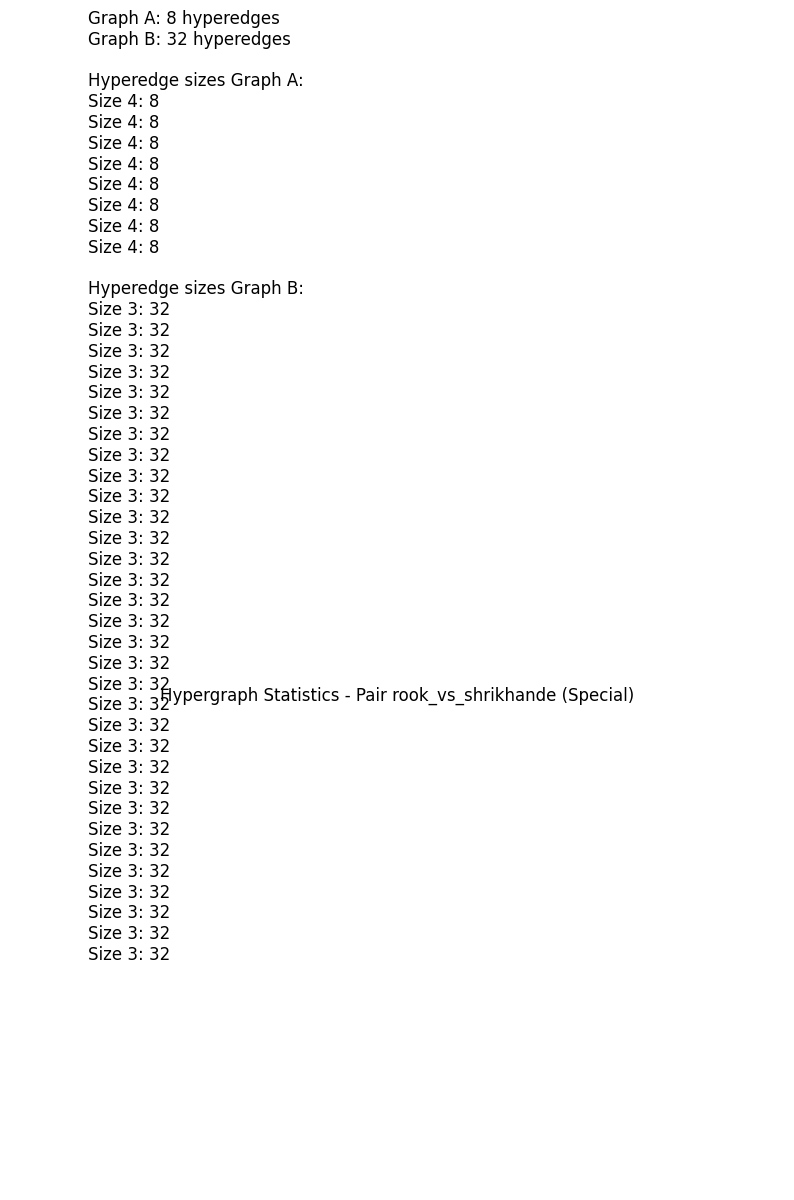

<Figure size 1500x800 with 0 Axes>

In [5]:
# Load the graphs
rook = nx.read_graph6("../data/Rook_Shrikhande/rook_graph.g6")
shrikhande = nx.read_graph6("../data/Rook_Shrikhande/shrikhande.g6")

rook_data = nx_to_pyg(rook)
shrikhande_data = nx_to_pyg(shrikhande)

# Analyze as a special pair
print("Analyzing Rook vs Shrikhande")

# Load the Rook and Shrikhande graphs
G1, G2 = rook, shrikhande

# Lift to hypergraphs
hg1_lifted = lift_to_hypergraph(G1, verbose=False, already_in_nx=True)
hg2_lifted = lift_to_hypergraph(G2, verbose=False, already_in_nx=True)

# Import matplotlib for inline plotting
%matplotlib inline
import matplotlib.pyplot as plt

# Plot the lifted hypergraphs
plot_hypergraph_pair(
    G1, G2, hg1_lifted, hg2_lifted, 
    "rook_vs_shrikhande", "Special", 
    display=True,
)

# If needed, you can also adjust the figure size
plt.figure(figsize=(15, 8))
plt.show()